# Chapter 6: Sentiment analysis with Logistic Regression

### Importing the necessary packages

In [1]:
# Importing packages
from matplotlib import pyplot as plt
import numpy as np
import random
np.random.seed(42)

### Plotting functions

In [46]:
def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in spam],
                   [s[0][1] for s in spam],
                   s = 100,
                   color = 'cyan',
                   edgecolor = 'k',
                   marker = '^')
    plt.scatter([s[0][0] for s in ham],
                   [s[0][1] for s in ham],
                   s = 100,
                   color = 'red',
                   edgecolor = 'k',
                   marker = 's')
    plt.xlabel('aack')
    plt.ylabel('beep')
    plt.legend(['happy','sad'])
        
def draw_line(a,b,c, color='black', linewidth=2.0, linestyle='solid', starting=0, ending=3):
#    # Plotting the line ax + by + c = 0
    x = np.linspace(starting, ending, 1000)
    plt.plot(x, -c/b - a*x/b, linestyle=linestyle, color=color, linewidth=linewidth)
    
def plot_boundary(features, labels, coefficients_lr, intercept_lr):
    # Define the range for the features
    x_min, x_max = features[:, 0].min() - 1, features[:, 0].max() + 1
    y_min, y_max = features[:, 1].min() - 1, features[:, 1].max() + 1

    # Generate x values for the line
    xx = np.linspace(x_min, x_max, 100)

    # Calculate corresponding y values using the equation of the decision boundary:
    # w0*x0 + w1*x1 + intercept = 0
    # x1 = (-w0*x0 - intercept) / w1
    yy_lr = (-coefficients_lr[0] * xx - intercept_lr) / coefficients_lr[1]

    # Plot the decision boundary (line) for Logistic Regression
    plt.plot(xx, yy_lr, color='orange', linestyle='-', label='Logistic Regression Decision Boundary')

    # Re-plot the original points
    # Separate points based on their labels
    features_label0 = features[labels == 0]
    features_label1 = features[labels == 1]

    # Plot points with label 0 as red squares
    plt.scatter(features_label0[:, 0], features_label0[:, 1], c='red', marker='s', label='Label 0')

    # Plot points with label 1 as blue triangles
    plt.scatter(features_label1[:, 0], features_label1[:, 1], c='blue', marker='^', label='Label 1')

    # Add labels and title
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Logistic Regression Decision Boundary and Data Points')
    plt.legend()
    plt.grid(True)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()

### Defining and plotting our dataset

In [47]:
import numpy as np
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[3,2],[2,3]])
labels = np.array([0,0,0,0,1,1,1,1])

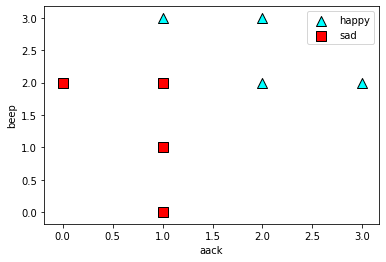

In [48]:
# Plotting the points
plot_points(features, labels)

# Uncomment the following line to see a good line fit for this data.
#draw_line(1,1,-3.5)

### Logistic regression

In [49]:
def sigmoid(x):
    # Note, in the book it appears as 1/(1+np.exp(-x)). Both expressions are equivalent, but the expression
    # below behaves better with small floating point numbers.
    return np.exp(x)/(1+np.exp(x))

def score(weights, bias, features):
    return np.dot(weights, features) + bias

def prediction(weights, bias, features):
    return sigmoid(score(weights, bias, features))

def log_loss(weights, bias, features, label):
    pred = 1.0*prediction(weights, bias, features)
    return -label*np.log(pred) - (1-label)*np.log(1-pred)

def total_log_loss(weights, bias, features, labels):
    total_error = 0
    for i in range(len(features)):
        total_error += log_loss(weights, bias, features[i], labels[i])
    return total_error

In [50]:
# Alternate way of writing log-loss

def soft_relu(x):
    return np.log(1+np.exp(x))

def alternate_log_loss(weights, bias, features, label):
    pred = prediction(weights, bias, features)
    return soft_relu((pred-label)*score(weights, bias, features))

def total_alternate_log_loss(weights, bias, features, labels):
    total_error = 0
    for i in range(len(features)):
        total_error += log_loss(weights, bias, features[i], labels[i])
    return total_error

In [51]:
def logistic_trick(weights, bias, features, label, learning_rate = 0.05):
    pred = prediction(weights, bias, features)
    for i in range(len(weights)):
        weights[i] += (label-pred)*features[i]*learning_rate
    bias += (label-pred)*learning_rate
    return weights, bias

In [58]:
def logistic_regression_algorithm(features, labels, learning_rate = 0.01, epochs = 500):
    plot_points(features, labels)
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    for i in range(epochs):
        # Comment the following line of code to remove the plots of all the classifiers
        draw_line(weights[0], weights[1], bias, color='grey', linewidth=0.0001, linestyle='dotted')
        errors.append(total_log_loss(weights, bias, features, labels))
        j = random.randint(0, len(features)-1)
        weights, bias = logistic_trick(weights, bias, features[j], labels[j])
    draw_line(weights[0], weights[1], bias, linewidth=2)
    plt.show()
    plt.scatter(range(epochs), errors)
    plt.xlabel('epochs')
    plt.ylabel('error')
    return weights, bias

/Users/luisserrano/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


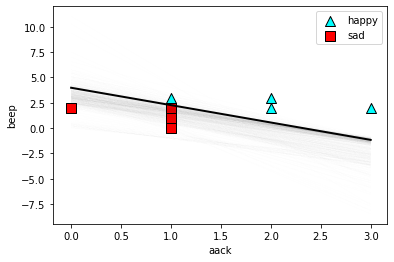

([1.2019181625782467, 0.700887175903297], -2.7884215106023387)

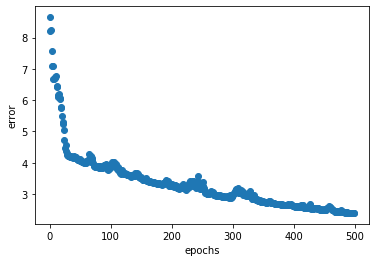

In [59]:
logistic_regression_algorithm(features, labels, epochs = 500)

# Logistic regression using scikit-learn

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
# Create a Logistic Regression model
logistic_regression = LogisticRegression()

# Fit the model to the data
logistic_regression.fit(features, labels)

# Predict the labels for the features
predictions_lr = logistic_regression.predict(features)

print("Logistic Regression Predictions:", predictions_lr)

Logistic Regression Predictions: [0 0 0 0 1 1 1 1]


In [12]:
# Get coefficients and intercept from the fitted model
coefficients_lr = logistic_regression.coef_[0]
intercept_lr = logistic_regression.intercept_[0]

print("Logistic Regression Coefficients:", coefficients_lr)
print("Logistic Regression Intercept:", intercept_lr)

Logistic Regression Coefficients: [1.00458154 0.93718206]
Logistic Regression Intercept: -3.1600974622062727


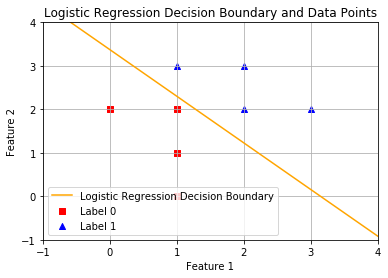

In [13]:
plot_boundary(features, labels, coefficients_lr, intercept_lr)